## Assignment 2

In this assignment you should write your own realization of EM algorithm for Gaussian Mixture Models and test it against k-means algorithm for clusterization. You can use vanila python, *numpy*, and *scipy* in your implementation of GMM

### Exercise 1

* Generate artificial dataset using *scikit-learn* by selection of your own set of blobs parameters
```python
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
...                   random_state=0)
```
* Try to cluster data using *scikit-learn* k-means algorithm and your own realization of Gaussian Mixture Models.
* Compare quality of clusterization for k-means and GMM using number of errors of clusterization

In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from matplotlib import pyplot as plt
from clustering import GMM
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)

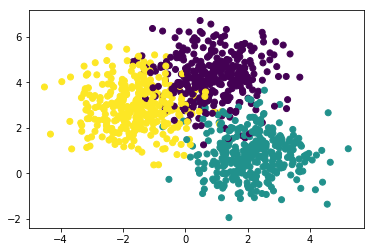

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
gmm = GMM(3)
gmm.fit(X)

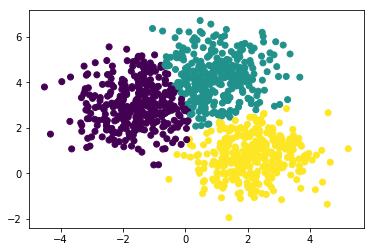

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=gmm.labels_)

In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

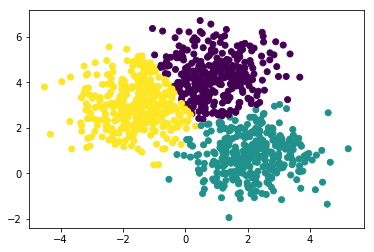

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

In [8]:
print 'Score for GMM:', adjusted_rand_score(y, gmm.labels_)
print 'Score for KMeans:', adjusted_rand_score(y, kmeans.labels_)

Score for GMM: 0.771666935477
Score for KMeans: 0.771903005962


Algorithms have almost the same result, but KMeans is better. I think, it is a result of the fact that our clusters sampled from symmetric Normal distributions and KMmeans uses this fact. (KMeans is hard EM algorithm with fixed covariances as identity matrices.) 

### Exercise 2

* Load *iris* dataset from *scikit-learn*
```python
from sklearn import datasets
iris = datasets.load_iris()
```
* Try to cluster data using *scikit-learn* k-means algorithm and your own realization of Gaussian Mixture Models.
* Compare quality of clusterization for k-means and GMM using number of errors of clusterization and your favorite measure of clustering quality
* Use output of k-means algorithm as initial values for Gaussian Mixture values. Compare, if this trick decreases number of iterations for algorithm to converge and if it affects overall quality of clusterization

In [9]:
from sklearn import datasets
iris = datasets.load_iris()

In [10]:
X = iris.data
y = iris.target

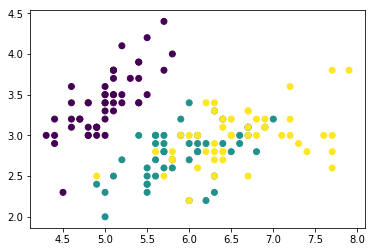

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
gmm = GMM(3)
gmm.fit(X)

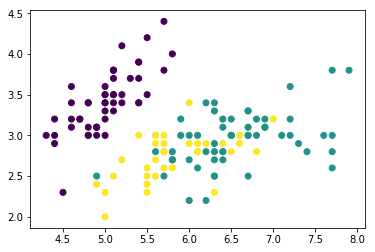

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=gmm.labels_)

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

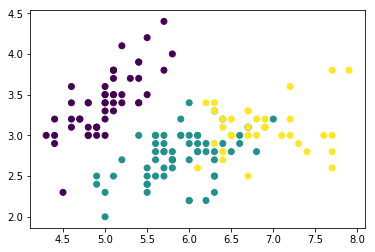

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

In [16]:
print 'Score for GMM:', adjusted_rand_score(y, gmm.labels_)
print 'Score for KMeans:', adjusted_rand_score(y, kmeans.labels_)

Score for GMM: 0.903874231775
Score for KMeans: 0.730238272283


GMM works much better with asymmetric clusters.

#### Experiments with initialization:

In [17]:
gmm = GMM(3, logging=True)
gmm.fit(X)

In [18]:
gmm_with_kmeans = GMM(3, init_kmeans=True, logging=True)
gmm_with_kmeans.fit(X)

In [19]:
print 'Number of iterations for usual GMM', len(gmm.logs['log_likelihood'])
print 'Number of iterations for GMM with KMeans init', len(gmm_with_kmeans.logs['log_likelihood'])

Number of iterations for usual GMM 18
Number of iterations for GMM with KMeans init 23


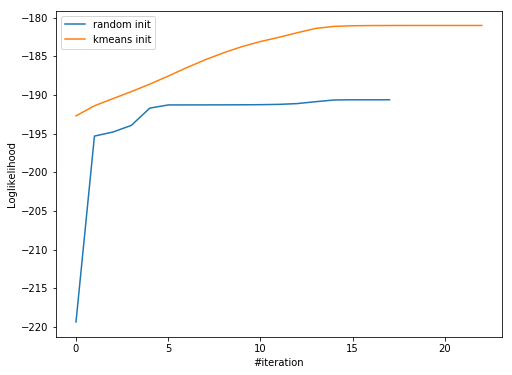

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(gmm.logs['log_likelihood'], label='random init')
plt.plot(gmm_with_kmeans.logs['log_likelihood'], label='kmeans init')
plt.xlabel('#iteration')
plt.ylabel('Loglikelihood')
plt.legend(loc='best')

In [21]:
print 'Score for random init:', adjusted_rand_score(y, gmm.labels_)
print 'Score for KMeans init:', adjusted_rand_score(y, gmm_with_kmeans.labels_)

Score for random init: 0.903874231775
Score for KMeans init: 0.903874231775


Undoubtedly, this initialization helps us to obtain better loglikelihood and also it demands less iterations. But it depends of restarts number for GMM with standart initialization. With KMeans I didn't use restarts for GMM. 